In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import seaborn
import joblib
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from IPython.utils import io
from multiprocessing import Pool

%matplotlib inline
%load_ext autoreload
%autoreload 2

from data_mining import *
from stacking.stacking import Stacking

In [2]:
features = [
    '*residues-d4-b10-a12-c5-n0-s0.1866--skip_errors.mat',
    '*hbonds-b6-a6-c6-n2-s0.1866--skip_errors.mat',
    '*solvation-b3-a2-c15-s0.1866--skip_errors.mat',
    '*backboneatom-b25-c7-n0-s0.1866--residue_type_dependent--skip_errors.mat',
]

model_pattern = 'ridge_pipeline_*__*_*.pkl'

# Load assessors

In [3]:
def test_assessor(args):
    (model, features, checksums, subset_pattern) = args
    try:
        assessor = joblib.load(model)
        normalizers = assessor.steps[0][1].normalizers
        pipeline = assessor.steps[1][1]

        with io.capture_output() as captured:
            X_test, scores_test = get_dataset(
                [(dataset, checksum, normalizer.transform)
                     for dataset, checksum, normalizer in zip(features, checksums, normalizers)],
                subset_pattern
            )

        natives_included = scoring_results(X_test, scores_test,
                                           lambda X: pipeline.predict(X),
                                           num_plots=0)[0]['GDT-TS-score']

        natives_excluded = scoring_results(X_test[~get_natives(scores_test).values],
                                           scores_test[~get_natives(scores_test).values],
                                           lambda X: pipeline.predict(X),
                                           num_plots=0)[0]['GDT-TS-score']

        return model, natives_included, natives_excluded
    except Exception as e:
        return model, pd.Series(), pd.Series()

def to_df(model, records):
    df = pd.concat(records, axis=1).T
    df.insert(0, 'Model', model)
    return df[~df.isnull().any(1)]


def test_assessors(checksums, subset_pattern, num_jobs=20):
    pool = Pool(num_jobs)
    results = pool.map(test_assessor, [(model, features, checksums, subset_pattern)
                                         for model in glob.glob(model_pattern)])
    model, records_natives_included, records_natives_excluded = zip(*results)

    return (to_df(model, records_natives_included),
            to_df(model, records_natives_excluded))

# Test assessors

## CASP11 Stage 1 and Stage 2

In [16]:
results_natives_included, results_natives_excluded = test_assessors(
    ['ef3274a90fe9e1f76f6a24c0a68f2ad1',
     'ef3274a90fe9e1f76f6a24c0a68f2ad1',
     'ef3274a90fe9e1f76f6a24c0a68f2ad1',
     'ef3274a90fe9e1f76f6a24c0a68f2ad1'],
    '^.*CASP11Stage[12]/T..../.*$',
    num_jobs=21
)

#### excluding native

In [17]:
results_natives_excluded

Model  \
GDT-TS-score     ridge_pipeline_NMA_14__4634_4611969_1.pkl   
GDT-TS-score   ridge_pipeline_CASP_564__160579_4611969.pkl   
GDT-TS-score      ridge_pipeline_CASP_22__6035_4611969.pkl   
GDT-TS-score    ridge_pipeline_NMA_92__30117_4611969_1.pkl   
GDT-TS-score          ridge_pipeline_92__53768_4611969.pkl   
GDT-TS-score  ridge_pipeline_NMA_346__110891_4611969_1.pkl   
GDT-TS-score    ridge_pipeline_CASP_237__67814_4611969.pkl   
GDT-TS-score    ridge_pipeline_NMA_31__10261_4611969_1.pkl   
GDT-TS-score        ridge_pipeline_527__319406_4611969.pkl   
GDT-TS-score    ridge_pipeline_CASP_346__99065_4611969.pkl   
GDT-TS-score        ridge_pipeline_491__297612_4611969.pkl   
GDT-TS-score    ridge_pipeline_NMA_39__12249_4611969_1.pkl   
GDT-TS-score          ridge_pipeline_39__23324_4611969.pkl   
GDT-TS-score            ridge_pipeline_5__3238_4611969.pkl   
GDT-TS-score        ridge_pipeline_201__122035_4611969.pkl   
GDT-TS-score   ridge_pipeline_CASP_382__108961_4611969.pkl   
GDT-TS-score        ridge_pipeline_165__100211_4611969.pkl   
GDT-TS-score  ridge_pipeline_NMA_527__170134_4611969_1.pkl   
GDT-TS-score   ridge_pipeline_NMA_201__65211_4611969_1.pkl   
GDT-TS-score          ridge_pipeline_56__33515_4611969.pkl   
GDT-TS-score        ridge_pipeline_310__186486_4611969.pkl   
GDT-TS-score   ridge_pipeline_CASP_418__118893_4611969.pkl   
GDT-TS-score  ridge_pipeline_NMA_564__181391_4611969_1.pkl   
GDT-TS-score    ridge_pipeline_CASP_128__36030_4611969.pkl   
GDT-TS-score   ridge_pipeline_NMA_310__98968_4611969_1.pkl   
GDT-TS-score        ridge_pipeline_237__143544_4611969.pkl   
GDT-TS-score   ridge_pipeline_NMA_165__53617_4611969_1.pkl   
GDT-TS-score     ridge_pipeline_CASP_39__10800_4611969.pkl   
GDT-TS-score   ridge_pipeline_NMA_273__88377_4611969_1.pkl   
GDT-TS-score      ridge_pipeline_NMA_5__1655_4611969_1.pkl   
...                                                    ...   
GDT-TS-score   ridge_pipeline_CASP_455__129862_4611969.pkl   
GDT-TS-score   ridge_pipeline_NMA_128__41048_4611969_1.pkl   
GDT-TS-score   ridge_pipeline_CASP_491__139354_4611969.pkl   
GDT-TS-score      ridge_pipeline_CASP_31__8492_4611969.pkl   
GDT-TS-score     ridge_pipeline_CASP_92__25776_4611969.pkl   
GDT-TS-score    ridge_pipeline_CASP_201__58096_4611969.pkl   
GDT-TS-score    ridge_pipeline_NMA_56__18206_4611969_1.pkl   
GDT-TS-score       ridge_pipeline_CASP_5__1301_4611969.pkl   
GDT-TS-score     ridge_pipeline_CASP_56__16171_4611969.pkl   
GDT-TS-score      ridge_pipeline_CASP_14__3966_4611969.pkl   
GDT-TS-score  ridge_pipeline_NMA_418__135045_4611969_1.pkl   
GDT-TS-score           ridge_pipeline_14__8565_4611969.pkl   
GDT-TS-score        ridge_pipeline_382__231669_4611969.pkl   
GDT-TS-score     ridge_pipeline_NMA_22__6945_4611969_1.pkl   
GDT-TS-score    ridge_pipeline_CASP_273__77723_4611969.pkl   
GDT-TS-score          ridge_pipeline_22__13636_4611969.pkl   
GDT-TS-score          ridge_pipeline_47__28437_4611969.pkl   
GDT-TS-score        ridge_pipeline_418__253790_4611969.pkl   
GDT-TS-score   ridge_pipeline_NMA_237__75794_4611969_1.pkl   
GDT-TS-score  ridge_pipeline_NMA_382__122151_4611969_1.pkl   
GDT-TS-score        ridge_pipeline_564__341970_4611969.pkl   
GDT-TS-score    ridge_pipeline_NMA_47__15227_4611969_1.pkl   
GDT-TS-score    ridge_pipeline_CASP_165__47215_4611969.pkl   
GDT-TS-score         ridge_pipeline_128__76424_4611969.pkl   
GDT-TS-score          ridge_pipeline_31__19478_4611969.pkl   
GDT-TS-score        ridge_pipeline_455__276531_4611969.pkl   
GDT-TS-score    ridge_pipeline_CASP_310__87989_4611969.pkl   
GDT-TS-score        ridge_pipeline_273__165139_4611969.pkl   
GDT-TS-score   ridge_pipeline_CASP_527__149990_4611969.pkl   
GDT-TS-score        ridge_pipeline_346__209745_4611969.pkl   

             Mean rank of the native      Top 1     Top 5  \
GDT-TS-score                 19.9641    0.11976  0.377246   
GDT-TS-score                  16.503   0.251497  0.532934   
GDT-TS-score             

limit_output extension: Maximum message size of 10000 exceeded with 26265 characters

## Plot

In [22]:
csv_name = 'learning_curve_CASP11Stage12.csv'
results_natives_excluded.to_csv(csv_name)

In [23]:
x = results_natives_excluded[results_natives_excluded.Model.apply(lambda x: x.startswith('ridge_pipeline_CASP_'))]

In [24]:
df = -x[['Mean Pearson', 'Mean Spearman', 'Mean Kendall tau', 'Mean loss score']]
df.index = pd.Series(x.Model.apply(lambda x: int(x.split('__')[-2].split('_')[-1])), name='Domains number')
df.sort_index(inplace=True)

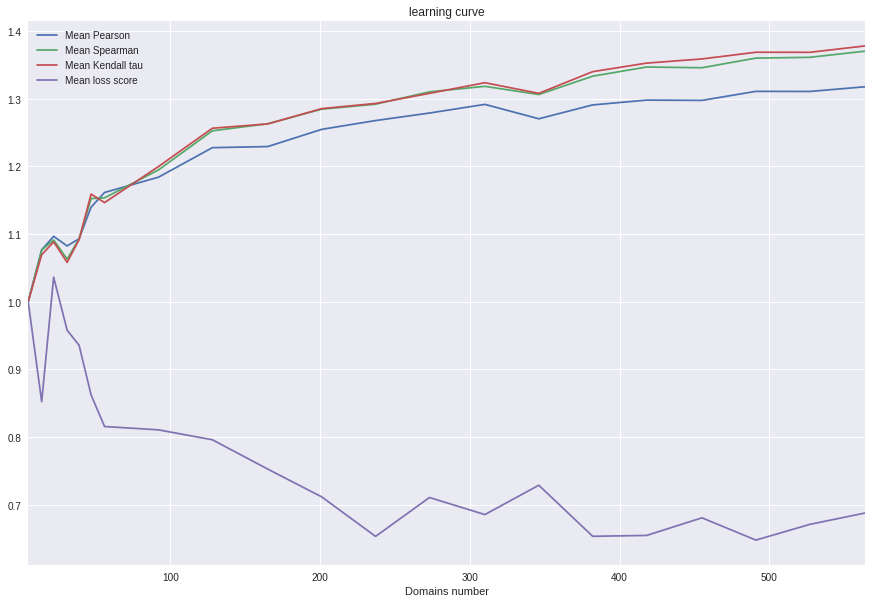

In [25]:
(df / df.iloc[0]).plot(figsize=(15, 10))
plt.title('learning curve')
plt.show()